In [1]:
!pip install pandas numpy scikit-learn torch matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()   # Will open a file chooser to upload CSV manually


Saving HR_Engagement_Survey_Data_with_Question_Details.csv to HR_Engagement_Survey_Data_with_Question_Details.csv


In [10]:
df = pd.read_csv(next(iter(uploaded)))  # Reads the uploaded file
df.head()


/tmp/ipython-input-3675166615.py:1: DtypeWarning: Columns (4,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(next(iter(uploaded)))  # Reads the uploaded file


,Year,Status,Role,Department,Director,Manager,Supervisor,Lead,Staff,Question,Answer_Numeric,Answer_Text
0,2020 Jun,Complete,Staff,Human Services,False,False,False,False,True,"07. At work, my opinions seem to count.",3,Agree
1,2020 Jun,Complete,Staff,District Court,False,False,False,False,True,"07. At work, my opinions seem to count.",3,Agree
2,2020 Jun,Complete,Staff,Superior Court,False,False,False,False,True,"07. At work, my opinions seem to count.",3,Agree
3,2021 May,Complete,Lead,Human Services,False,False,False,True,False,"07. At work, my opinions seem to count.",3,Agree
4,2019 May,Partial,NaN,NaN,False,False,False,False,False,01. I know what is expected of me at work.,0,NaN


In [11]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numeric values with mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Year                0
Status              0
Role              595
Department        731
Director          204
Manager           204
Supervisor          0
Lead              204
Staff             204
Question            0
Answer_Numeric      0
Answer_Text       745
dtype: int64


/tmp/ipython-input-2899561539.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
import numpy as np

np.random.seed(42)  # for reproducibility
df["Dropout"] = np.random.choice([0, 1], size=len(df))
# 0 = No dropout, 1 = Dropout



In [14]:
# Assume target column is 'Dropout' (adjust if different)
X = df.drop("Dropout", axis=1)
y = df["Dropout"]

# Normalize numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to numpy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train).view(-1, 1)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test).view(-1, 1)


In [16]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

model = MLP(X_train.shape[1])


In [17]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [18]:
epochs = 50
train_losses = []

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/50], Loss: 0.6937
Epoch [20/50], Loss: 0.6933
Epoch [30/50], Loss: 0.6932
Epoch [40/50], Loss: 0.6930
Epoch [50/50], Loss: 0.6930


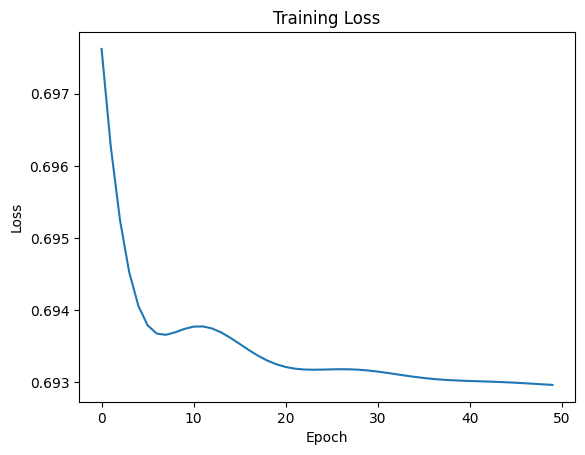

In [19]:
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


In [20]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred >= 0.5).float()

acc = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class)
rec = recall_score(y_test, y_pred_class)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")


Accuracy: 0.4927
F1 Score: 0.4806
Precision: 0.4993
Recall: 0.4632
